In [36]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch
import numpy as np
import cv2
from samples.CLS2IDX import CLS2IDX
import os 

# Auxiliary Functions

In [37]:
from baselines.ViT.ViT_LRP import deit_base_patch16_224 as vit_LRP
from baselines.ViT.ViT_new import deit_base_patch16_224
from baselines.ViT.ViT_orig_LRP import deit_base_patch16_224 as vit_orig_LRP
from baselines.ViT.ViT_explanation_generator import IBA

normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize,
])

# create heatmap from mask on image
def show_cam_on_image(img, mask):
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(img)
    cam = cam / np.max(cam)
    return cam

model = vit_LRP(pretrained=True).cuda()
model.eval()
attribution_generator = IBA(model)

def generate_visualization(original_image, class_index=None):
    transformer_attribution = attribution_generator.generate_LRP(original_image.unsqueeze(0).cuda(), method="IBA", index=class_index).detach()
    transformer_attribution = transformer_attribution.reshape(1, 1, 14, 14)
    transformer_attribution = torch.nn.functional.interpolate(transformer_attribution, scale_factor=16, mode='bilinear')
    transformer_attribution = transformer_attribution.reshape(224, 224).cuda().data.cpu().numpy()
    transformer_attribution = (transformer_attribution - transformer_attribution.min()) / (transformer_attribution.max() - transformer_attribution.min())
    image_transformer_attribution = original_image.permute(1, 2, 0).data.cpu().numpy()
    image_transformer_attribution = (image_transformer_attribution - image_transformer_attribution.min()) / (image_transformer_attribution.max() - image_transformer_attribution.min())
    vis = show_cam_on_image(image_transformer_attribution, transformer_attribution)
    vis =  np.uint8(255 * vis)
    vis = cv2.cvtColor(np.array(vis), cv2.COLOR_RGB2BGR)
    return vis


def print_top_classes(predictions, **kwargs):    
    # Print Top-5 predictions
    prob = torch.softmax(predictions, dim=1)
    class_indices = predictions.data.topk(5, dim=1)[1][0].tolist()
    max_str_len = 0
    class_names = []
    for cls_idx in class_indices:
        class_names.append(CLS2IDX[cls_idx])
        if len(CLS2IDX[cls_idx]) > max_str_len:
            max_str_len = len(CLS2IDX[cls_idx])
    
    print('Top 5 classes:')
    for cls_idx in class_indices:
        output_string = '\t{} : {}'.format(cls_idx, CLS2IDX[cls_idx])
        output_string += ' ' * (max_str_len - len(CLS2IDX[cls_idx])) + '\t\t'
        output_string += 'value = {:.3f}\t prob = {:.1f}%'.format(predictions[0, cls_idx], 100 * prob[0, cls_idx])
        print(output_string)

Top 5 classes:
	348 : ram, tup                                                                                       		value = 6.942	 prob = 44.6%
	349 : bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis		value = 2.647	 prob = 0.6%
	111 : nematode, nematode worm, roundworm                                                             		value = 2.647	 prob = 0.6%
	437 : beacon, lighthouse, beacon light, pharos                                                       		value = 2.557	 prob = 0.6%
	350 : ibex, Capra ibex                                                                               		value = 2.363	 prob = 0.5%


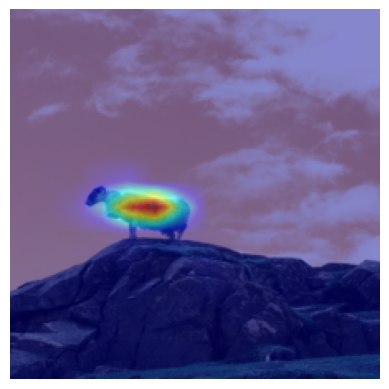

In [39]:
image = Image.open('samples/000000016502.jpg')
dog_cat_image = transform(image)

fig, axs = plt.subplots()
# axs.imshow(image);
# axs.axis('off');

output = model(dog_cat_image.unsqueeze(0).cuda())
print_top_classes(output)

# dog 
# generate visualization for class 243: 'bull mastiff' - the predicted class
dog = generate_visualization(dog_cat_image)

# cat - generate visualization for class 282 : 'tiger cat'
cat = generate_visualization(dog_cat_image, class_index=386)


axs.imshow(dog,cmap='gray');
axs.axis('off');

Top 5 classes:
	340 : zebra                    		value = 6.941	 prob = 39.8%
	9 : ostrich, Struthio camelus		value = 4.474	 prob = 3.4%
	942 : butternut squash         		value = 3.620	 prob = 1.4%
	925 : consomme                 		value = 3.300	 prob = 1.0%
	940 : spaghetti squash         		value = 3.252	 prob = 1.0%


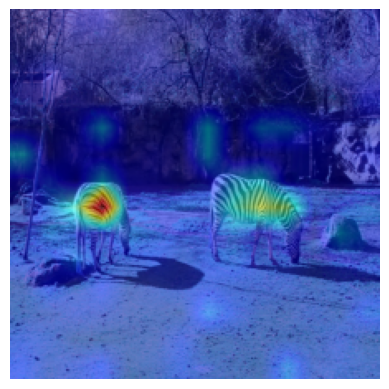

In [40]:
image = Image.open('samples/000000020059.jpg')
dog_cat_image = transform(image)

fig, axs = plt.subplots()
# axs.imshow(image);
# axs.axis('off');

output = model(dog_cat_image.unsqueeze(0).cuda())
print_top_classes(output)

# dog 
# generate visualization for class 243: 'bull mastiff' - the predicted class
dog = generate_visualization(dog_cat_image)

# cat - generate visualization for class 282 : 'tiger cat'
cat = generate_visualization(dog_cat_image, class_index=386)


axs.imshow(cat,cmap='gray');
axs.axis('off');

Top 5 classes:
	293 : cheetah, chetah, Acinonyx jubatus		value = 5.024	 prob = 9.5%
	355 : llama                            		value = 4.896	 prob = 8.4%
	353 : gazelle                          		value = 4.218	 prob = 4.2%
	9 : ostrich, Struthio camelus        		value = 2.898	 prob = 1.1%
	340 : zebra                            		value = 2.556	 prob = 0.8%


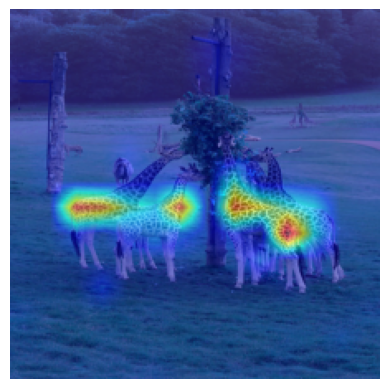

In [41]:
image = Image.open('samples/000000059386.jpg')
dog_cat_image = transform(image)

fig, axs = plt.subplots()
# axs.imshow(image);
# axs.axis('off');

output = model(dog_cat_image.unsqueeze(0).cuda())
print_top_classes(output)

# dog 
# generate visualization for class 243: 'bull mastiff' - the predicted class
dog = generate_visualization(dog_cat_image)

# cat - generate visualization for class 282 : 'tiger cat'
cat = generate_visualization(dog_cat_image, class_index=386)


axs.imshow(dog,cmap='gray');
axs.axis('off');

Top 5 classes:
	385 : Indian elephant, Elephas maximus          		value = 6.157	 prob = 24.4%
	386 : African elephant, Loxodonta africana      		value = 4.568	 prob = 5.0%
	78 : tick                                      		value = 2.963	 prob = 1.0%
	549 : envelope                                  		value = 2.891	 prob = 0.9%
	844 : switch, electric switch, electrical switch		value = 2.511	 prob = 0.6%


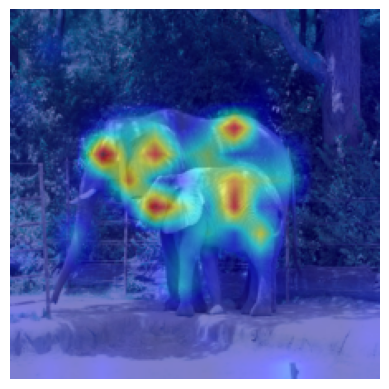

In [42]:
image = Image.open('samples/000000080274.jpg')
dog_cat_image = transform(image)

fig, axs = plt.subplots()
# axs.imshow(image);
# axs.axis('off');

output = model(dog_cat_image.unsqueeze(0).cuda())
print_top_classes(output)

# dog 
# generate visualization for class 243: 'bull mastiff' - the predicted class
dog = generate_visualization(dog_cat_image)

# cat - generate visualization for class 282 : 'tiger cat'
cat = generate_visualization(dog_cat_image, class_index=386)


axs.imshow(dog,cmap='gray');
axs.axis('off');

Top 5 classes:
	128 : black stork, Ciconia nigra  		value = 6.175	 prob = 29.2%
	127 : white stork, Ciconia ciconia		value = 4.878	 prob = 8.0%
	134 : crane                       		value = 1.379	 prob = 0.2%
	21 : kite                        		value = 1.319	 prob = 0.2%
	141 : redshank, Tringa totanus    		value = 1.167	 prob = 0.2%


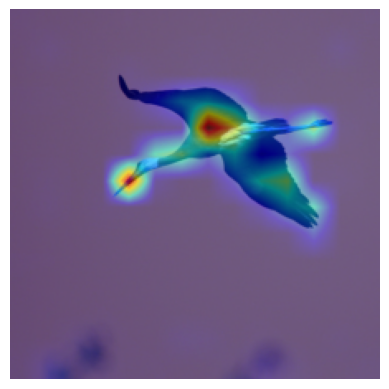

In [46]:
image = Image.open('samples/ILSVRC2012_val_00032580.JPEG')
dog_cat_image = transform(image)

fig, axs = plt.subplots()
# axs.imshow(image);
# axs.axis('off');

output = model(dog_cat_image.unsqueeze(0).cuda())
print_top_classes(output)

# dog 
# generate visualization for class 243: 'bull mastiff' - the predicted class
dog = generate_visualization(dog_cat_image)

# cat - generate visualization for class 282 : 'tiger cat'
cat = generate_visualization(dog_cat_image, class_index=128)


axs.imshow(cat,cmap='gray');
axs.axis('off');

Top 5 classes:
	153 : Maltese dog, Maltese terrier, Maltese		value = 6.750	 prob = 34.1%
	940 : spaghetti squash                     		value = 3.999	 prob = 2.2%
	885 : velvet                               		value = 3.182	 prob = 1.0%
	951 : lemon                                		value = 3.160	 prob = 0.9%
	203 : West Highland white terrier          		value = 3.153	 prob = 0.9%


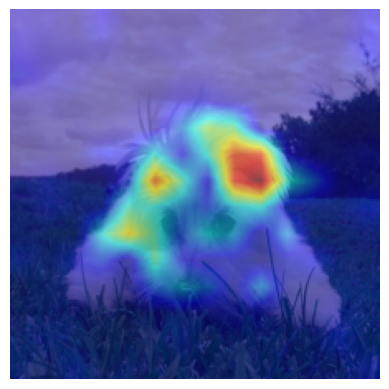

In [51]:
image = Image.open('samples/ILSVRC2012_val_00029546.JPEG')
dog_cat_image = transform(image)

fig, axs = plt.subplots()
# axs.imshow(image);
# axs.axis('off');

output = model(dog_cat_image.unsqueeze(0).cuda())
print_top_classes(output)

# dog 
# generate visualization for class 243: 'bull mastiff' - the predicted class
dog = generate_visualization(dog_cat_image)

# cat - generate visualization for class 282 : 'tiger cat'
cat = generate_visualization(dog_cat_image, class_index=386)


axs.imshow(dog,cmap='gray');
axs.axis('off');

Top 5 classes:
	207 : golden retriever  		value = 6.523	 prob = 35.7%
	208 : Labrador retriever		value = 4.288	 prob = 3.8%
	285 : Egyptian cat      		value = 3.641	 prob = 2.0%
	222 : kuvasz            		value = 3.422	 prob = 1.6%
	281 : tabby, tabby cat  		value = 2.778	 prob = 0.8%


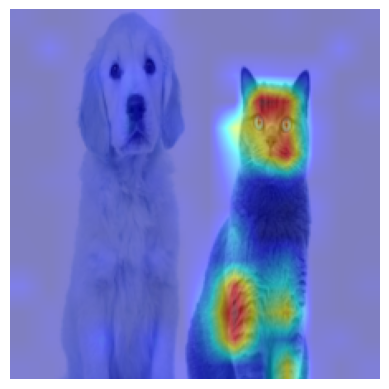

In [56]:
image = Image.open('samples/dogcat2.png')
dog_cat_image = transform(image)

fig, axs = plt.subplots()
# axs.imshow(image);
# axs.axis('off');

output = model(dog_cat_image.unsqueeze(0).cuda())
print_top_classes(output)

# golden retriever - the predicted class
dog = generate_visualization(dog_cat_image)

# generate visualization for class 285: 'Egyptian cat'
cat = generate_visualization(dog_cat_image, class_index=285)


axs.imshow(cat);
axs.axis('off');